In [2]:
import warnings
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin1')
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# As we can see, last 3 columns is not very useful as it has many null values, so we can drop them
new_df = df[['v2', 'v1']]
new_df.head()

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
new_df = new_df.rename(columns = {'v2' : 'sms', 'v1' : 'target'})
new_df.sample(5)

,sms,target
3043,Let me know how it changes in the next 6hrs. I...,ham
4699,WIN: We have a winner! Mr. T. Foley won an iPo...,spam
1956,K...k:)why cant you come here and search job:),ham
5042,O ic lol. Should play 9 doors sometime yo,ham
2359,Spook up your mob with a Halloween collection ...,spam


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
# ham = 0 and spam = 1
new_df['target'] = encoder.fit_transform(new_df['target'])
new_df.head()

,sms,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
# missing values - we got this information from info() that there are not any missing values
# check for duplicate values

new_df.duplicated().sum()

403

In [10]:
new_df.drop_duplicates(keep = 'first', inplace = True)

In [11]:
new_df.shape

(5169, 2)

# EDA

In [12]:
# count of target values
new_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

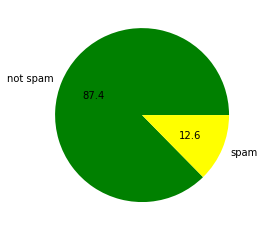

In [13]:
import matplotlib.pyplot as plt
plt.pie(new_df['target'].value_counts(), labels = ['not spam', 'spam'], colors = ['green', 'yellow'], autopct = '%0.1f')
plt.show()

#### This data is imbalanced

In [14]:
import nltk
import string 
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [15]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [16]:
# number of characters in sms
new_df['no_of_characters'] = new_df['sms'].apply(lambda x : len(x))

In [17]:
new_df.head()

,sms,target,no_of_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [18]:
# number of words
# new_df['sms'].apply(lambda x : len(x.split(' ')))

In [19]:
new_df['no_of_words'] = new_df['sms'].apply(lambda x : nltk.word_tokenize(x)).apply(len)

In [20]:
new_df.head()

,sms,target,no_of_characters,no_of_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [21]:
new_df['no_of_sentences'] = new_df['sms'].apply(lambda x : nltk.sent_tokenize(x)).apply(len)

In [22]:
new_df.head()

,sms,target,no_of_characters,no_of_words,no_of_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [23]:
new_df.iloc[:, 2:].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
not_spam_df = new_df[new_df['target'] == 0]
not_spam_df.iloc[:, 2:].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
spam_df = new_df[new_df['target'] == 1]
spam_df.iloc[:, 2:].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


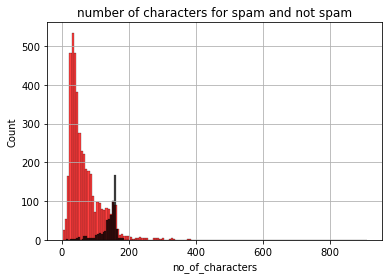

In [26]:
sns.histplot(not_spam_df, x = 'no_of_characters', color = 'red')
sns.histplot(spam_df, x = 'no_of_characters', color = 'black')

plt.title('number of characters for spam and not spam')
plt.grid()
plt.show()

<AxesSubplot:>

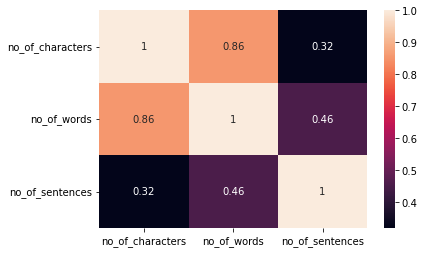

In [27]:
sns.heatmap(spam_df.iloc[:, 2:].corr(), annot = True)

<AxesSubplot:>

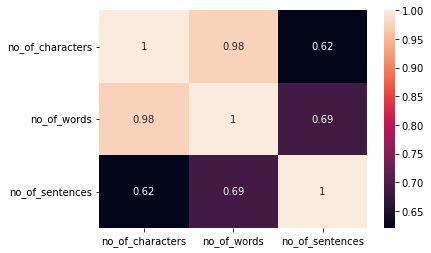

In [28]:
sns.heatmap(not_spam_df.iloc[:, 2:].corr(method = 'pearson'), annot = True)

# Text processing

In [29]:
sbs = SnowballStemmer('english')

def process(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    text1 = []
    for i in text:
        if i.isalnum():
            text1.append(i)

    text = text1[:]
    text1.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text1.append(i)

    text = text1[:]
    text1.clear()
    
    for i in text:
        text1.append(sbs.stem(i))
        
    return " ".join(text1)

In [30]:
process('I loved the YT lectures on Machine learning. How about you ?')

'love yt lectur machin learn'

In [31]:
new_df['new_sms'] = new_df['sms'].apply(lambda x : process(x))

In [32]:
new_df.head()

,sms,target,no_of_characters,no_of_words,no_of_sentences,new_sms
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [33]:
# from wordcloud import WordCloud
# wc = WordCloud(width = 50, height = 50, background_color = 'black')

In [34]:
# spam_wc = wc.generate(new_df[new_df['target'] == 1]['new_sms'].str.cat(sep = ' '))
# plt.imshow(spam_wc)

In [35]:
# mostcommon = FreqDist(new_df['new_sms']).most_common(10)

# wordcloud = WordCloud(width = 1600, height = 800, background_color = 'white').generate(str(mostcommon))
# fig = plt.figure(figsize = (30,10), facecolor = 'white')
# plt.imshow(wordcloud, interpolation = "bilinear")
# plt.axis('off')
# plt.title('Top 10 most common words', fontsize = 50)
# plt.tight_layout(pad = 0)
# plt.show()

In [36]:
spam_corpus = []

for i in new_df[new_df['target'] == 1]['new_sms'].tolist():
    for j in i.split(' '):
        spam_corpus.append(j)

len(spam_corpus)

9939

In [37]:
from collections import Counter
c =  Counter(spam_corpus).most_common(10)
c

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

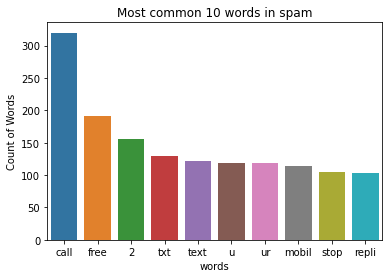

In [38]:
sns.barplot(x = pd.DataFrame(c)[0], y = pd.DataFrame(c)[1])

plt.title('Most common 10 words in spam')
plt.xlabel('words')
plt.ylabel('Count of Words')
plt.show()

In [39]:
not_spam_corpus = []

for i in new_df[new_df['target'] == 0]['new_sms'].tolist():
    for j in i.split(' '):
        not_spam_corpus.append(j)

len(not_spam_corpus)

35413

In [40]:
from collections import Counter
c1 =  Counter(not_spam_corpus).most_common(10)
pd.DataFrame(c1)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


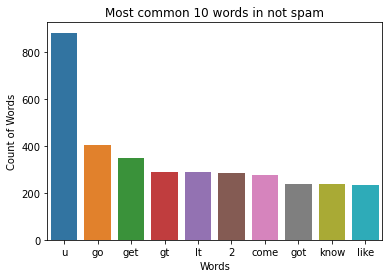

In [41]:
sns.barplot(x = pd.DataFrame(c1)[0], y = pd.DataFrame(c1)[1])

plt.title('Most common 10 words in not spam')
plt.xlabel('Words')
plt.ylabel('Count of Words')
plt.show()

In [42]:
pd.DataFrame(c1)[0]

0       u
1      go
2     get
3      gt
4      lt
5       2
6    come
7     got
8    know
9    like
Name: 0, dtype: object

# Model building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [44]:
X = cv.fit_transform(new_df['new_sms']).toarray()

In [45]:
y = new_df['target'].values

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 10, stratify = y)

In [93]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [94]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [95]:
mnb.fit(x_train, y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.97678916827853
[[448   4]
 [  8  57]]
0.9344262295081968


Text(51.0, 0.5, 'Real Labels')

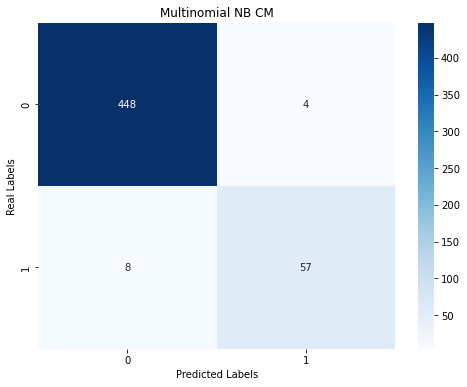

In [108]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, 
            fmt='', cmap='Blues')

plt.title('Multinomial NB CM')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [97]:
gnb.fit(x_train, y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8607350096711799
[[388  64]
 [  8  57]]
0.47107438016528924


Text(51.0, 0.5, 'Real Labels')

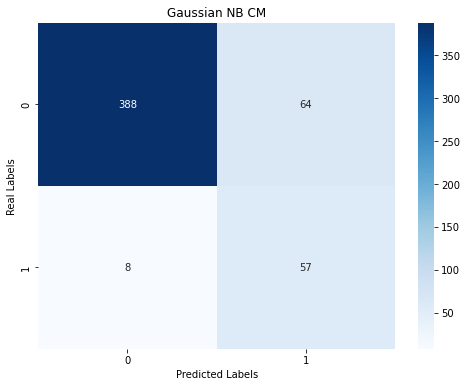

In [109]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, 
            fmt='', cmap='Blues')

plt.title('Gaussian NB CM')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [99]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9671179883945842
[[452   0]
 [ 17  48]]
1.0


Text(51.0, 0.5, 'Real Labels')

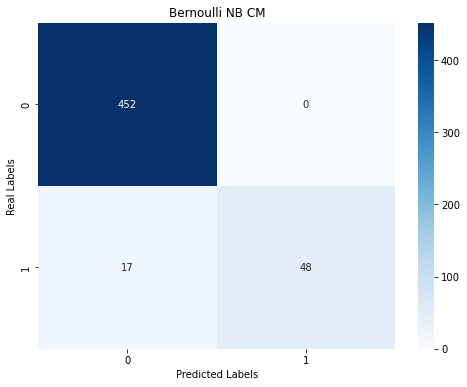

In [110]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, 
            fmt='', cmap='Blues')

plt.title('Bernoulli NB CM')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [101]:
# keeping bernoulli NB with CountVectorizer as its precison score is 100%
# in spam classifier precision score is very important as we want to guess all the non_spam email as non_spam

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [103]:
y_pred4 = lr.predict(x_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

0.9671179883945842
[[452   0]
 [ 17  48]]
1.0


Text(51.0, 0.5, 'Real Labels')

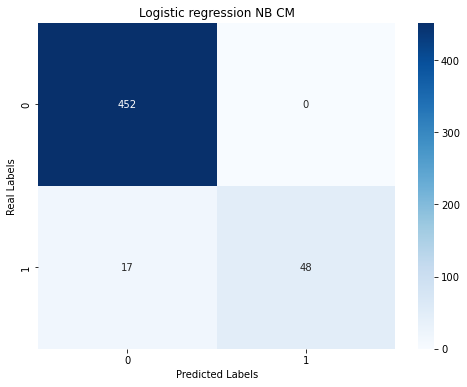

In [111]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred4), annot = True, 
            fmt='', cmap='Blues')

plt.title('Logistic regression NB CM')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [105]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 10
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)

In [106]:
cross_val_results = cross_val_score(lr, X, y, cv = kf)

In [107]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.97678917 0.9787234  0.96905222 0.9729207  0.9729207  0.98065764
 0.98452611 0.9729207  0.97678917 0.98837209]
Mean Accuracy: 0.9773671899599659


In [62]:
bnb_cross_val_results = cross_val_score(bnb, X, y, cv = kf)

In [63]:
print(f'Cross-Validation Results (Accuracy): {bnb_cross_val_results}')
print(f'Mean Accuracy: {bnb_cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.97098646 0.96905222 0.97098646 0.96324952 0.96905222 0.97485493
 0.9787234  0.96711799 0.96324952 0.98255814]
Mean Accuracy: 0.970983086680761


In [126]:
result_df = pd.DataFrame({'Model' : ['MNB', 'GNB', 'BNB', 'Logistic'], 
                          'Score' : [precision_score(y_test, y_pred1), precision_score(y_test, y_pred2),
                                    precision_score(y_test, y_pred3), precision_score(y_test, y_pred4)]})

result_df

,Model,Score
0,MNB,0.934426
1,GNB,0.471074
2,BNB,1.000000
3,Logistic,1.000000


In [131]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Model", "Accuracy Score", "Precision Score"]) 
  
# Add rows 
myTable.add_row(["Multinomial NB", round(accuracy_score(y_test, y_pred1), 2), round(precision_score(y_test, y_pred1), 2)]) 
myTable.add_row(["Gaussian NB", round(accuracy_score(y_test, y_pred2), 2), round(precision_score(y_test, y_pred2), 2)]) 
myTable.add_row(["Bernoulli NB", round(accuracy_score(y_test, y_pred3), 2), precision_score(y_test, y_pred3)]) 
myTable.add_row(["Logistic", round(accuracy_score(y_test, y_pred4), 2), precision_score(y_test, y_pred4)])

print(myTable)

+----------------+----------------+-----------------+
|     Model      | Accuracy Score | Precision Score |
+----------------+----------------+-----------------+
| Multinomial NB |      0.98      |       0.93      |
|  Gaussian NB   |      0.86      |       0.47      |
|  Bernoulli NB  |      0.97      |       1.0       |
|    Logistic    |      0.97      |       1.0       |
+----------------+----------------+-----------------+


# Bernoulli Naive Bayes : 
It assumes that all our features are binary such that they take only two values. 
Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

# Multinomial Naive Bayes : 
Its is used when we have discrete data 
(e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). 
In text learning we have the count of each word to predict the class or label.

# Gaussian Naive Bayes : 
Because of the assumption of the normal distribution, 
Gaussian Naive Bayes is used in cases when all our features are continuous. 
For example in Iris dataset features are sepal width, petal width, sepal length, petal length. 
So its features can have different values in data set as width and length can vary. 
We can’t represent features in terms of their occurrences. This means data is continuous. 
Hence we use Gaussian Naive Bayes here.